# 専修大学経済学部「統計学1」レジュメ，相関
- 散布図
- 標本相関係数
- 標本偏相関係数
- 直線のあてはめ

In [1]:
# R環境内に存在するすべてのオブジェクトを削除します。
# これにより、作業空間がクリアされ、新たな分析を始める際に他のオブジェクトによる干渉を避けることができます。
rm(list = ls())

# パッケージの読み込みとデータ読み込み
library(tidyverse)
url <- "https://raw.githubusercontent.com/JeC2017/public_data/main/childcare.csv"
childcare <- read.csv(url, header=TRUE)

# 2010年のデ一タ
childcare_hh_all_2010 <- childcare %>%
  subset(subset = (year == 2010) & (hh.type == "all"))

str(childcare_hh_all_2010)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


'data.frame':	47 obs. of  11 variables:
 $ pref        : chr  "北海道" "青森県" "岩手県" "宮城県" ...
 $ year        : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ emp.rate    : num  0.378 0.559 0.556 0.425 0.602 ...
 $ cap.rate    : num  0.272 0.539 0.431 0.24 0.5 ...
 $ age         : num  33.3 33.3 33.1 33.2 33.4 ...
 $ age.hus     : num  35.1 35.2 35 35 35.2 ...
 $ emp.rate.hus: num  0.957 0.959 0.956 0.935 0.958 ...
 $ urate       : num  0.0712 0.0898 0.0707 0.0779 0.0698 ...
 $ nuc.rate    : num  0.923 0.695 0.659 0.779 0.644 ...
 $ numhh       : int  166765 39654 40307 80144 29790 36752 66625 102319 71171 70805 ...
 $ hh.type     : chr  "all" "all" "all" "all" ...


In [2]:
# 2010年
# x: 保育所定員率，y: 母親就業率，z: 核家族世帯率
x <- childcare_hh_all_2010$cap.rate
y <- childcare_hh_all_2010$emp.rate
z <- childcare_hh_all_2010$nuc.rate

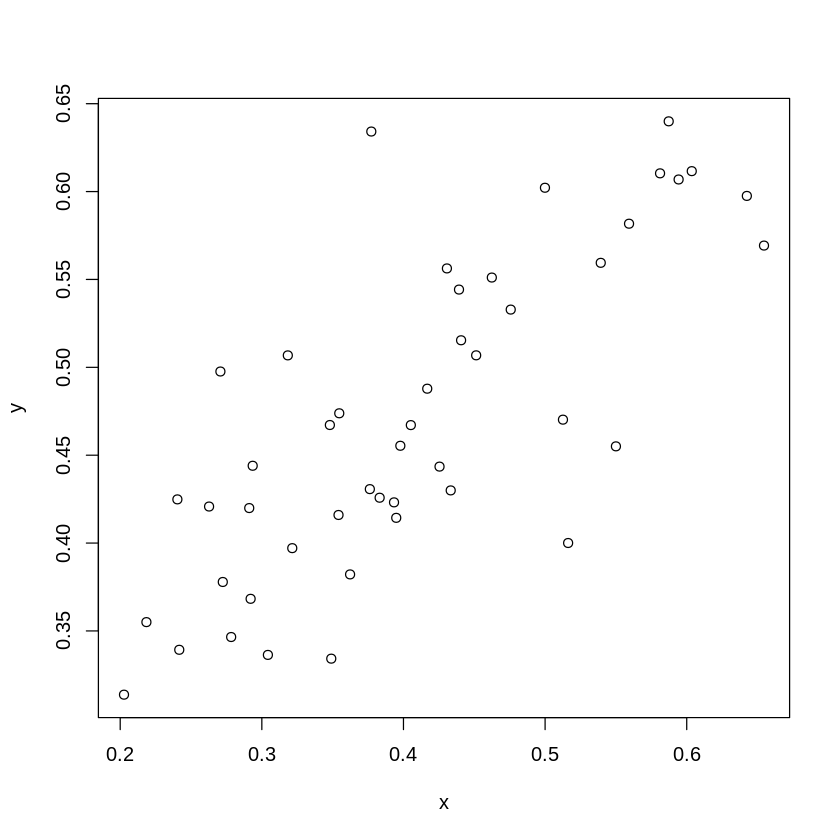

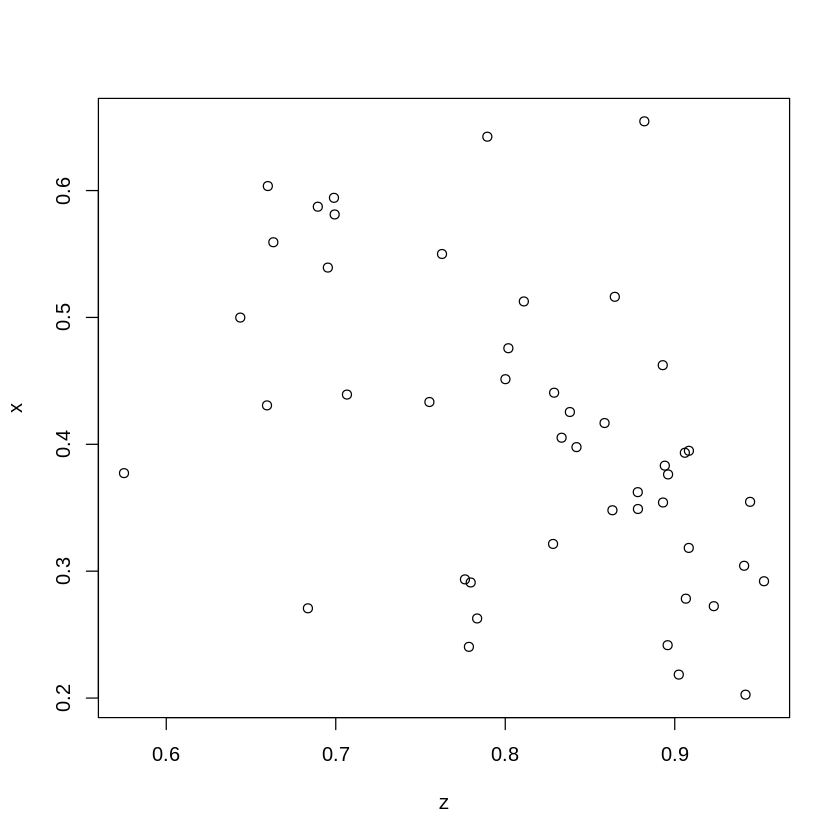

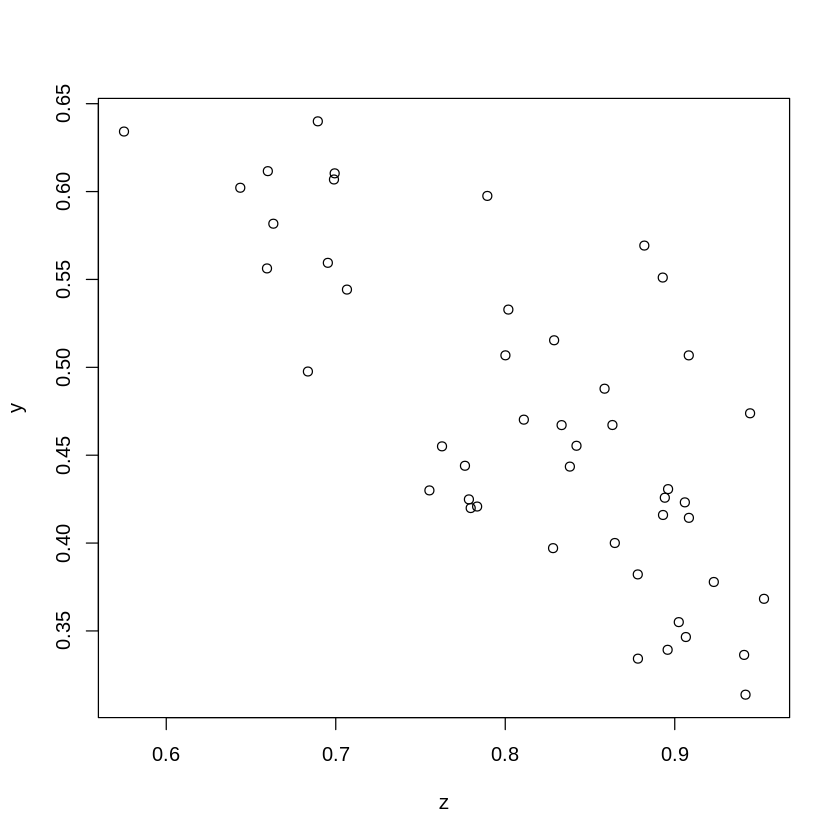

In [3]:
# xとyの散布図
plot(x, y)

# zとxの散布図
plot(z, x)

# zとyの散布図
plot(z, y)


In [4]:
# xとyの標本相関係数
r_xy <- cor(x, y)
r_xy

# zとxの標本相関係数
r_zx <- cor(z, x)
r_zx

# zとyの標本相関係数
r_zy <- cor(z, y)
r_zy

[1] 0.7616449

[1] -0.4727443

[1] -0.7491003

xとyの標本偏相関係数 (交絡因子: z)

$$
r_{xy,z} =\frac{ r_{xy}- r_{zx} r_{zy} }{ \sqrt{ 1 - r_{zx}^2 }\sqrt{ 1 - r_{zy}^2}}
$$

In [5]:
# xとyの標本偏相関数
(r_xy - r_zx*r_zy)/(sqrt(1-r_zx^2)*sqrt(1-r_zy^2))

[1] 0.6980856


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     0.2362       0.5775  



Call:
lm(formula = y ~ x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.134322 -0.038976 -0.003099  0.032816  0.180062 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.23623    0.03101   7.617 1.25e-09 ***
x            0.57749    0.07324   7.885 5.07e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05898 on 45 degrees of freedom
Multiple R-squared:  0.5801,	Adjusted R-squared:  0.5708 
F-statistic: 62.17 on 1 and 45 DF,  p-value: 5.075e-10


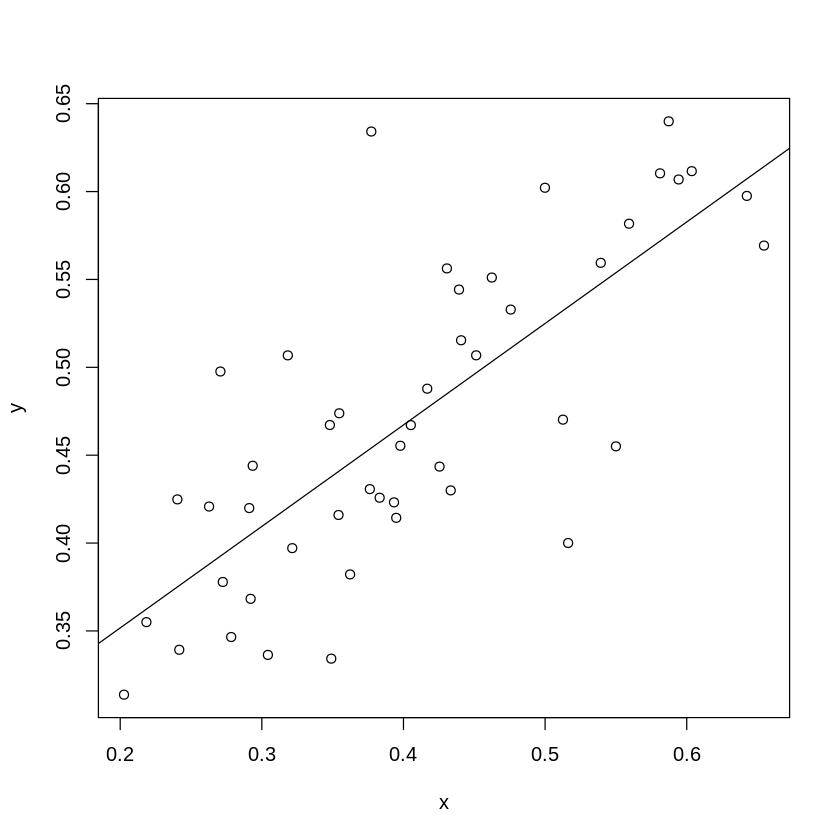

In [10]:
# 直線のあてはめ
# x と y の間の線形関係（直線の関係）をモデル化します
lm(y~x)

# 最小二乗法で計算した結果を fit.ols に格納します
fit.ols <- lm(y~x)

# summary関数は、例えば推定された係数、標準誤差、t値、p値などを提供します
summary(fit.ols)

plot(x, y)
# fit.ols に基づいて推定された線形回帰を既存のプロット（散布図）に追加します。
# これにより、x と y の間の線形関係が直線として表示されます。
abline(fit.ols)

In [15]:
# 単回帰における R-squared = (r_xy)^2
r_xy^2

[1] 0.580103